# Alura - Data Science - Análise de Datos con Python

## Introducción
El objetivo de este proyecto es realizar un análisis exploratorio de datos de un dataset de inmuebles de Bogotá, Colombia.

### Dia 1
Objetivos:
1. Obtener el promedio del Area de los inmuebles por Barrio. (Solamente los 10 primeros Barrios)
2. Consultar otros datos estadisticos como la mediana, desviación estándar, etc.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Creamos una función para limpiar los datos de la columna Valor, ya que contiene caracteres especiales que no nos permiten convertir el valor a un tipo de dato numérico.

In [2]:
clean_string_of_value = lambda x: x.replace('$','').replace('.','')

Cargamos el dataset y mostramos las columnas del mismo.

In [3]:
# Load Dataset
df = pd.read_csv('../inmuebles_bogota.csv')

In [4]:
# Show columns of the dataset
df.columns

Index(['Tipo', 'Descripcion', 'Habitaciones', 'Baños', 'Área', 'Barrio', 'UPZ',
       'Valor'],
      dtype='object')

Para evitar problemas con los caracteres especiales, renombramos las columnas que contienen caracteres especiales.

In [5]:
# Rename columns to delete special characters
rename_columns = {'Baños':'Banos', 'Área':'Area'}
df.rename(columns=rename_columns, inplace=True)

In [6]:
# Show sample of the dataset to see the changes
df.sample(10)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
7777,Casa,Casa en venta en Engativa,8,4,196,Engativa,Engativá,$ 650.000.000
6152,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,81,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 311.000.000
5396,Apartamento,Apartamento en venta en Bella Suiza,3,3,117,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 620.000.000
1817,Apartamento,Apartamento en venta en Usaquén,1,2,86,Usaquén,Usaquén,$ 700.000.000
6934,Casa,Casa en venta en Roma,8,3,260,Roma,Timiza,$ 350.000.000
6846,Apartamento,Apartamento en venta en La Calleja,3,3,176,La Calleja,USAQUÉN: Country Club + Santa Bárbara,$ 1.200.000.000
188,Apartamento,Apartamento en venta en Cedritos,3,3,82,Cedritos,Usaquén,$ 350.000.000
3746,Casa,Casa en venta en Usaquén,4,4,150,Usaquén,Usaquén,$ 480.000.000
7070,Apartamento,Apartamento en venta en Chapinero,3,5,249,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 3.960.000.000
5965,Casa,Casa en venta en Zona Noroccidental,3,4,106,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 490.000.000


Siempre es importante conocer el tipo de dato de cada columna, para saber si es necesario realizar alguna conversión de tipo de dato.

En este caso, existe información que podriamos pasar por alto y que puede afectar nuestro analisis, como por ejemplo, la columna **UPZ** que contiene valores nulos en comparación con el total de registros del dataset y que nuestra columna **Valor** es de **tipo objeto**.

In [7]:
# Get general information of the dataset and see the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


### obtenemos los registros a los que pertenecen los valores nulos de la columna UPZ

Ahora tenemos una mejor idea de nuestros datos y hasta que punto nos puede afectar. :D

Podemos ver que el **Barrio Pasadena** contiene los registros con valores nulos en la columna **UPZ**.

In [8]:
# Show rows with missing values
df[df['UPZ'].isnull()]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
724,Apartamento,Apartamento en venta en Pasadena,3,2,103,Pasadena,NaN,$ 478.000.000
1473,Apartamento,Apartamento en venta en Pasadena,3,2,109,Pasadena,NaN,$ 472.000.000
1522,Apartamento,Apartamento en venta en Pasadena,3,2,80,Pasadena,NaN,$ 480.000.000
1716,Apartamento,Apartamento en venta en Pasadena,2,3,109,Pasadena,NaN,$ 699.000.000
1993,Casa,Casa en venta en Pasadena,3,3,161,Pasadena,NaN,$ 950.000.000
2163,Casa,Casa en venta en Pasadena,3,3,161,Pasadena,NaN,$ 950.000.000
2267,Casa,Casa en venta en Pasadena,4,4,250,Pasadena,NaN,$ 1.500.000.000
2268,Apartamento,Apartamento en venta en Pasadena,1,2,49,Pasadena,NaN,$ 340.000.000
2354,Apartamento,Apartamento en venta en Pasadena,2,2,64,Pasadena,NaN,$ 320.000.000
2428,Apartamento,Apartamento en venta en Pasadena,2,2,71,Pasadena,NaN,$ 360.000.000


Seguimos explorando los datos y vemos que la columna **Valor** contiene caracteres especiales que no nos permiten convertir el valor a un tipo de dato numérico.
es por eso que hacemos uso de la función lambda para limpiar los datos de la columna **Valor**.

In [9]:
# Use the lambda function to remove the characters from the string and convert to int
df['Valor'] = df['Valor'].apply(clean_string_of_value).astype(float)

Verificamos que el tipo de dato de la columna **Valor** haya cambiado.

In [10]:
df.sample(5)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
5943,Apartamento,Apartamento en venta en Chico Reservado,3,3,143,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,690000000.0
2015,Apartamento,Apartamento en venta en Bella Suiza,2,3,93,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,740607900.0
736,Apartamento,Apartamento en venta en Mazuren,3,2,68,Mazuren,El Prado,520000000.0
5793,Apartamento,Apartamento en venta en Villas De Granada,3,2,50,Villas De Granada,Garcés Navas,180000000.0
1121,Apartamento,Apartamento en venta en La Calleja,3,2,91,La Calleja,USAQUÉN: Country Club + Santa Bárbara,480000000.0


### Obtenemos el total de valores por Barrio (se muestran los 10 primeros Barrios con más valores)

<Axes: xlabel='Barrio'>

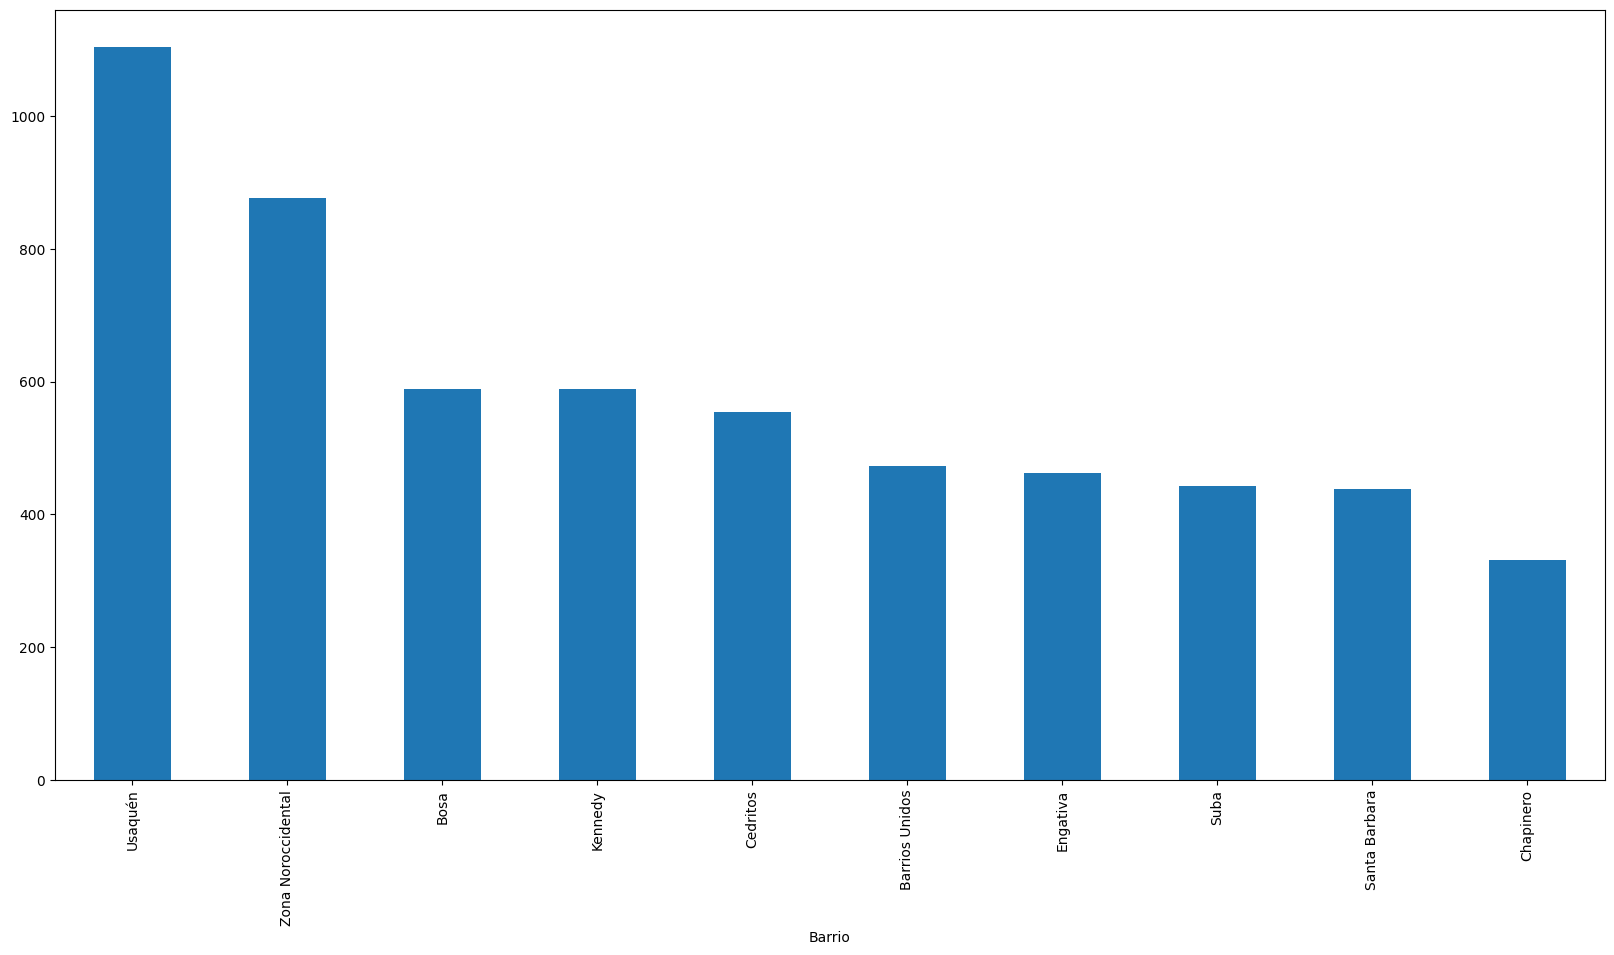

In [11]:
# Total of values per Barrio
values_of_barrios = df['Barrio'].value_counts()
# Show the first Barrios with more values
values_of_barrios.head(10).plot(kind='bar', figsize=(20,10))

### Obtenemos el promedio del Area de los inmuebles por Barrio (se muestran los 10 primeros Barrios con más valores)

- Agrupamos los datos por Barrio y obtenemos el promedio de la columna **Area**.
- Ordenamos los datos de manera descendente.

In [12]:
# Get mean of the values per Barrio
mean_values_of_barrios = df.groupby('Barrio')['Area'].mean().sort_values(ascending=False)

### Crear un gráfico de barras con los valores ordenados de manera descendente

Se puede observar que el Barrio **Modelia** tiene un resultado inconsistente y el resultado se disparó por encima de los demás. 
Por qué sucedió esto?

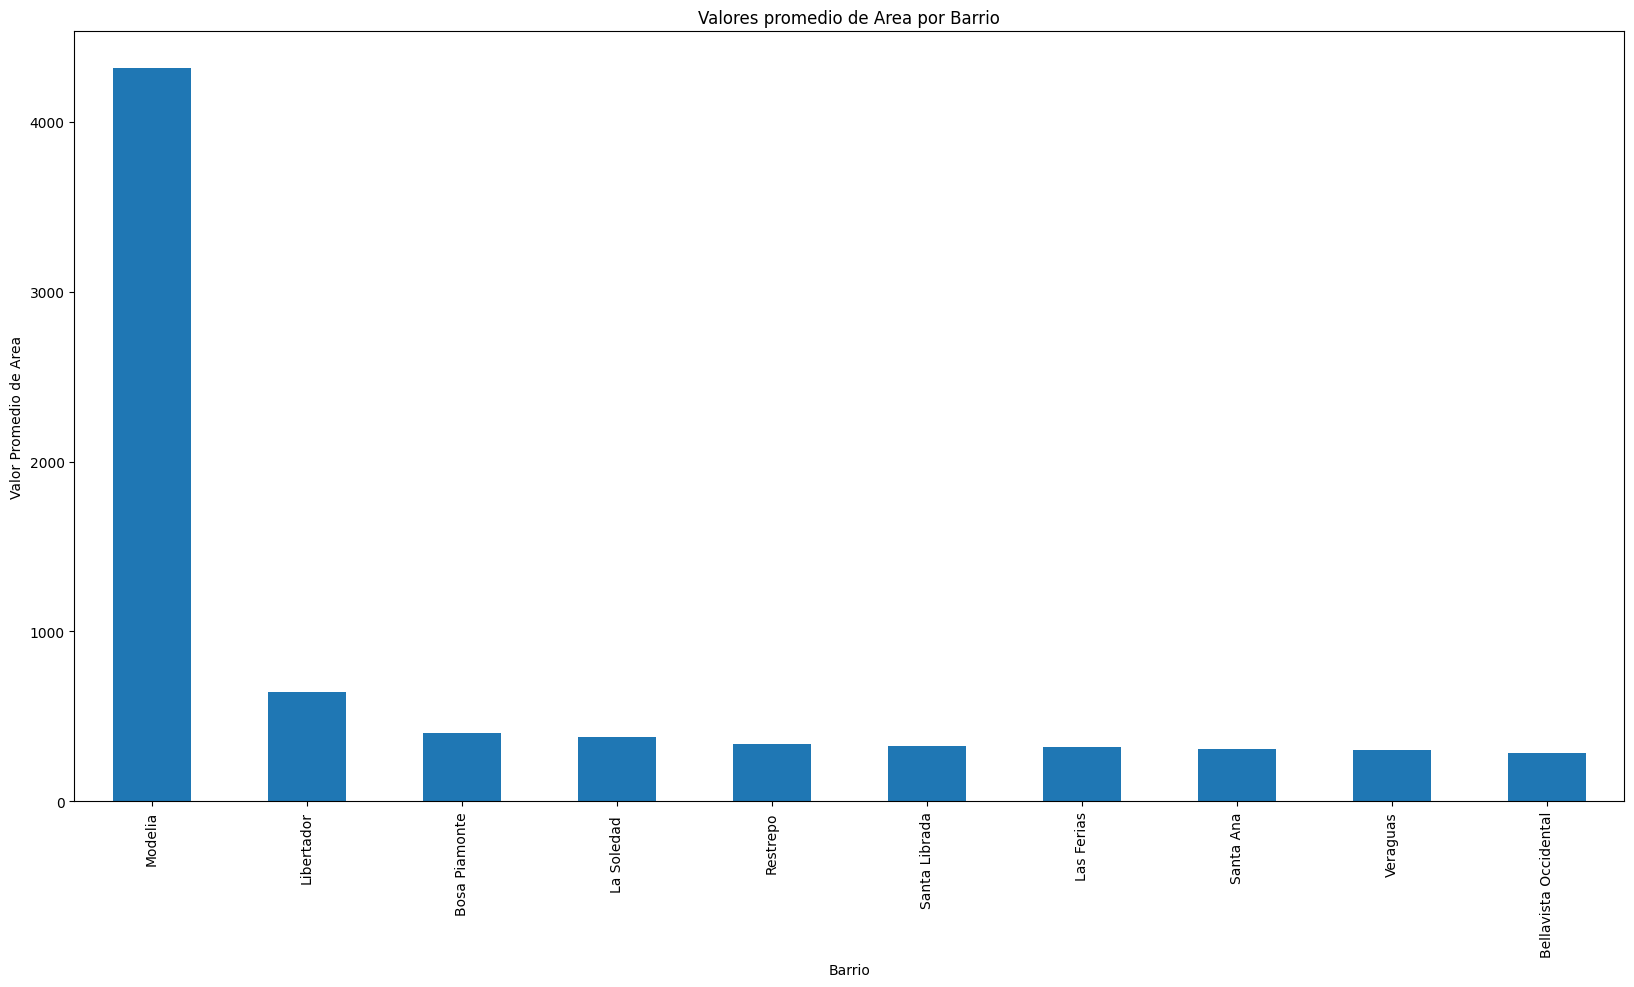

In [13]:
# Crear un gráfico de barras con los valores ordenados de manera descendente
plt.figure(figsize=(20, 10))
mean_values_of_barrios.head(10).plot(kind='bar')
plt.title('Valores promedio de Area por Barrio')
plt.xlabel('Barrio')
plt.ylabel('Valor Promedio de Area')
plt.show()

Investigamos los datos de manera general en busca de outliers y que datos podrian estar afectando el resultado.

Analizamos los datos de la columna **Area** en busca del minimo y maximo valor.

In [14]:
# Get the value of the apartment with the minimum value
df['Area'].min()

2

In [15]:
# Get the value of the apartment with the maximum value
df['Area'].max()

166243

El valor maximo es considerablemente mayor asi que analizamos los datos de manera individual.

In [16]:
# Get information of the apartment with index
df.iloc[df['Area'].idxmax()]

Tipo                                Casa
Descripcion     Casa en venta en Modelia
Habitaciones                           4
Banos                                  3
Area                              166243
Barrio                           Modelia
UPZ                             Fontibón
Valor                        850000000.0
Name: 7073, dtype: object

Su descripción y tipo de inmueble no nos da información relevante, asi que analizamos todos los datos de la columna **Area** en busca de mayor contexto.

### Gráfico de dispersión

Una manera de visualizar los datos con mayor precisión es mediante un gráfico de dispersión.
Buscaremos cuantos valores atípicos se salen de un rango aceptable.

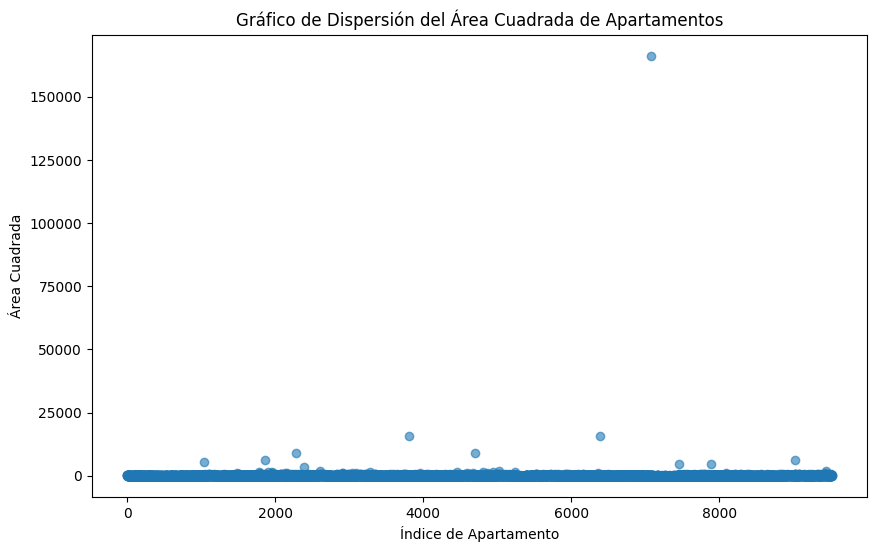

In [17]:
# Search possible outliers
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df)), df['Area'], alpha=0.6)
plt.title('Gráfico de Dispersión del Área Cuadrada de Apartamentos')
plt.xlabel('Índice de Apartamento')
plt.ylabel('Área Cuadrada')
plt.show()

Ahora con estan información somos concientes de que el valor maximo de la columna **Area** es un valor atípico, afectando el resultado y solammente es un valor atípico, los demás se encuentran dentro de un rango aceptable.

Guardamos el valor atípico en una variable y lo eliminamos del dataset para obtener una mejor visualización.

**Nota:** Existen maneras de manejar estos valores, pero en este caso lo eliminaremos del dataset en memoria.

In [18]:
# Save values of the outliers
atypical_values = df[df['Area'] == df['Area'].idxmax()]
# Delete the outliers from the dataset to get a better visualization
df.drop(df['Area'].idxmax(), inplace=True)

### Gráfico de barras sin el valor atípico

Ahora podemos ver que los datos se encuentran dentro de un rango aceptable y que antes el barrio **Modelia** se encontraba por encima de los demás Barrios, ahora se encuentra fuera del top 10.

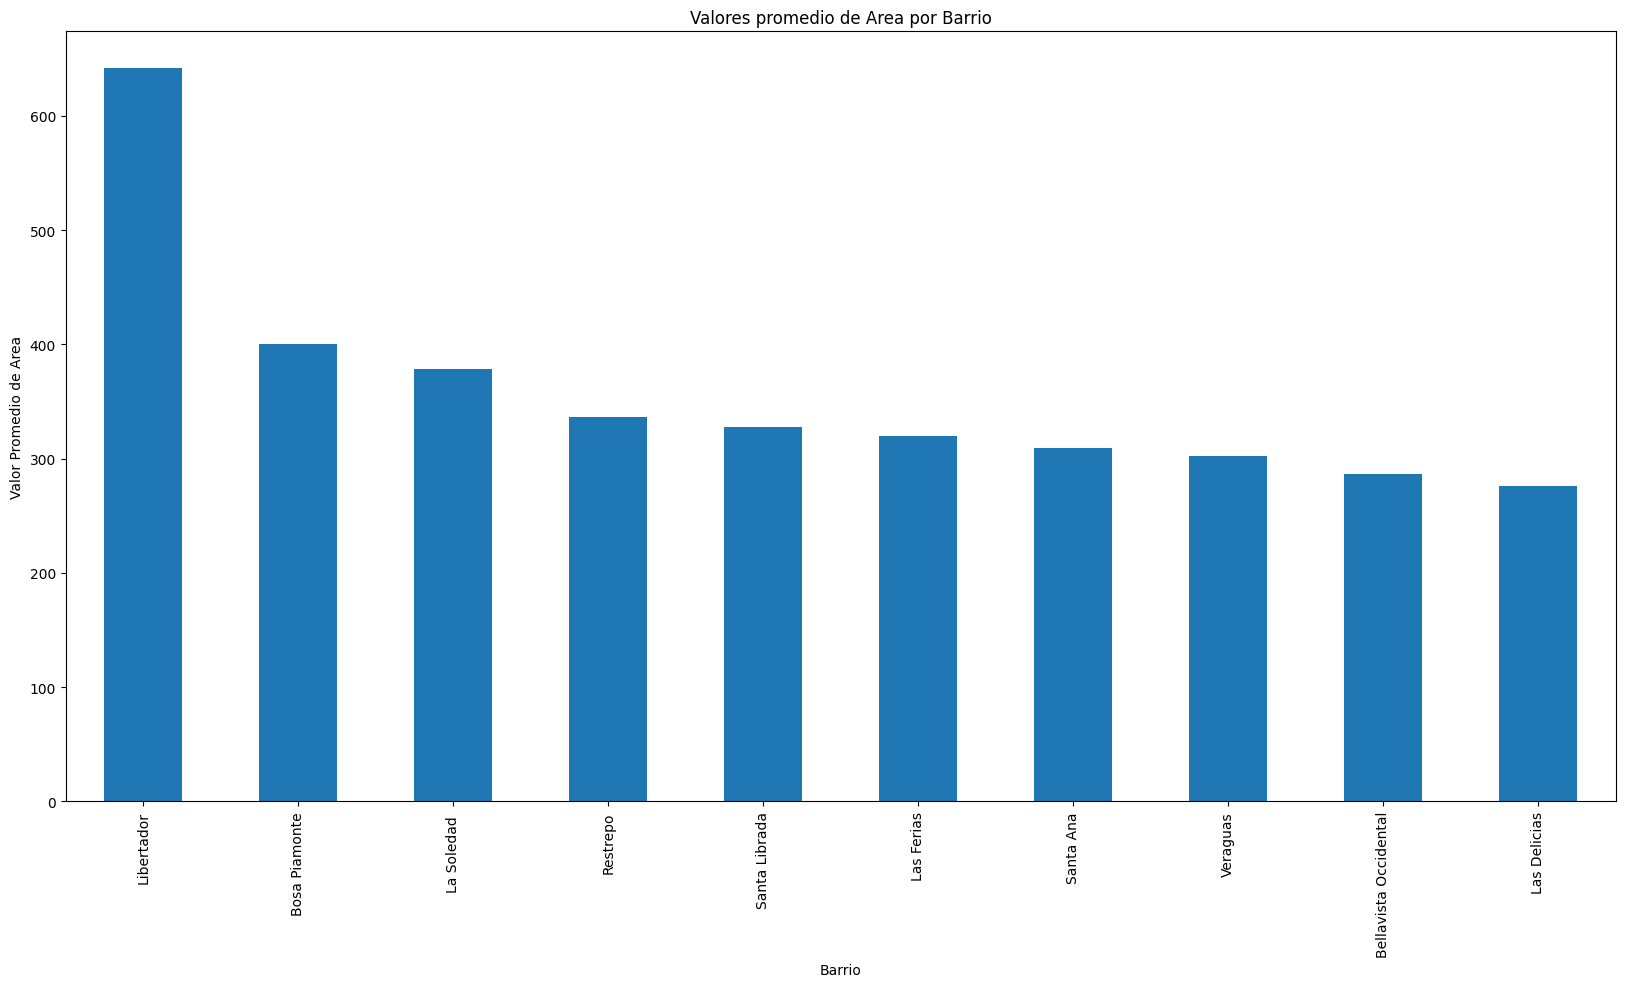

In [19]:
# Get mean of the values per Barrio
mean_values_of_barrios = df.groupby('Barrio')['Area'].mean().sort_values(ascending=False)
# Crear un gráfico de barras con los valores ordenados de manera descendente
plt.figure(figsize=(20, 10))
mean_values_of_barrios.head(10).plot(kind='bar')
plt.title('Valores promedio de Area por Barrio')
plt.xlabel('Barrio')
plt.ylabel('Valor Promedio de Area')
plt.show()

### Obtenemos otros datos estadísticos como la mediana, desviación estándar, etc.

In [20]:
df.describe()

,Habitaciones,Banos,Area,Valor
count,9519.000000,9519.000000,9519.000000,9.519000e+03
mean,3.072382,2.447841,129.215779,6.020363e+08
std,2.049942,1.255367,314.926239,7.046345e+08
min,1.000000,0.000000,2.000000,6.000000e+07
25%,2.000000,2.000000,57.000000,2.500000e+08
50%,3.000000,2.000000,80.000000,4.090000e+08
75%,3.000000,3.000000,135.000000,6.800000e+08
max,110.000000,9.000000,15920.000000,1.600000e+10


### Obtenemos el promedio de habitaciones por Barrio (se muestran los 10 primeros Barrios con más valores)

In [21]:
# Get relation between the values of the columns Barrio and Bedrooms
bedrooms_of_barrios = df.groupby('Barrio')['Habitaciones'].mean().round().head(10).sort_values(ascending=False)

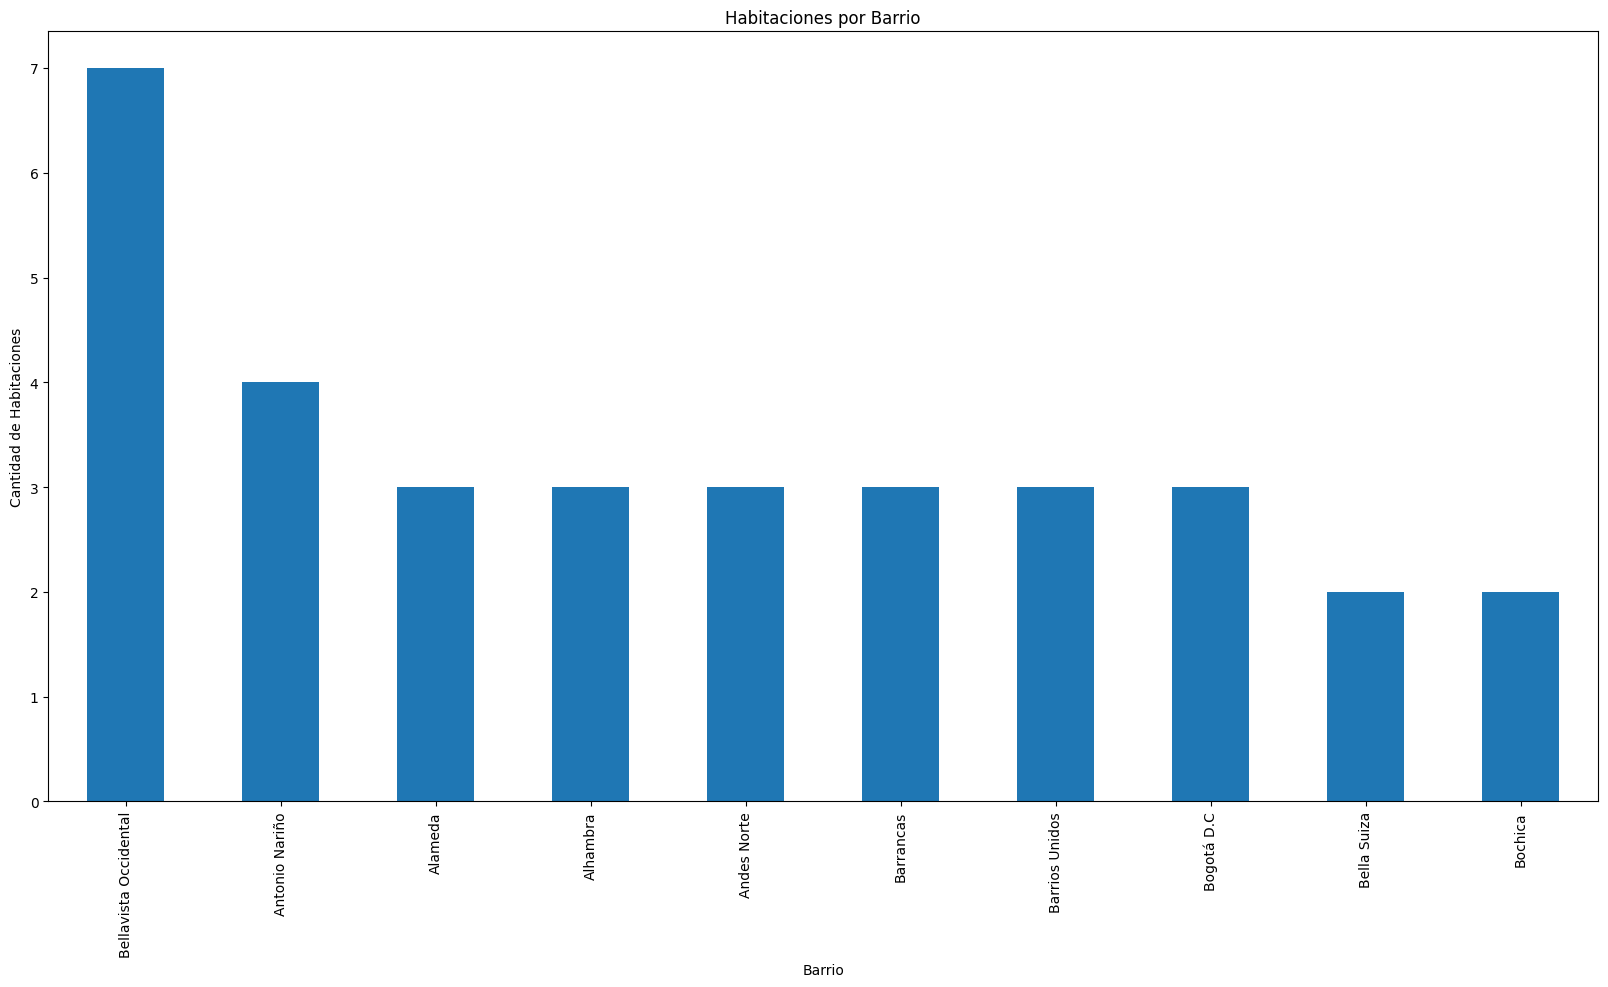

In [22]:
bedrooms_of_barrios.plot(kind='bar', figsize=(20,10))
plt.title("Habitaciones por Barrio")
plt.xlabel("Barrio")
plt.ylabel("Cantidad de Habitaciones")
plt.xticks(rotation=90)  # Para rotar las etiquetas del eje x si es necesario
plt.show()